## Task 3 - Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

### Importing all required libraries

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

### Reading the dataset

In [139]:
iris_df=pd.read_csv('iris.csv')
iris_df.shape

(150, 6)

In [140]:
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [141]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [142]:
iris_df.isna().sum()  #Checking for missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Feature visualization

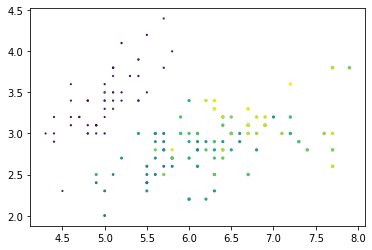

In [143]:
plt.scatter(iris_df['SepalLengthCm'],iris_df['SepalWidthCm'],iris_df['PetalLengthCm'],iris_df['PetalWidthCm'])

### Finding the Optimial number of Clusters needed

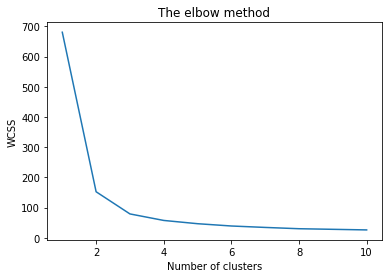

In [144]:
from sklearn.cluster import KMeans
wcss = []

x = iris_df.iloc[:, [1, 2, 3, 4]].values  ##Extracting all feature values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the "elbow" occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

### Initializing and fitting the K-means model

In [150]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Here, Each of the values represents the distinct Iris species.
<br>
0 - Setosa,
1 - Versicolor,
2 - Virginica

In [148]:
centroids=pd.DataFrame({'centroid_x':kmeans.cluster_centers_[:,0],'centroid_y':kmeans.cluster_centers_[:,1]})
centroids

,centroid_x,centroid_y
0,5.901613,2.748387
1,5.006000,3.418000
2,6.850000,3.073684


### Clusters visualization

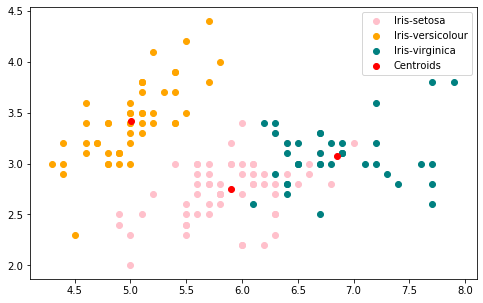

In [149]:
plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'teal', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'red', label = 'Centroids')
plt.legend()